Data Description:

importing required libraries.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Loading the dataset.

In [123]:
df=pd.read_excel('Final_Train.csv')

In [124]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [125]:
df.shape      #checking data dimensions.

(5961, 7)

In [126]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Checking for Null Values.

In [128]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

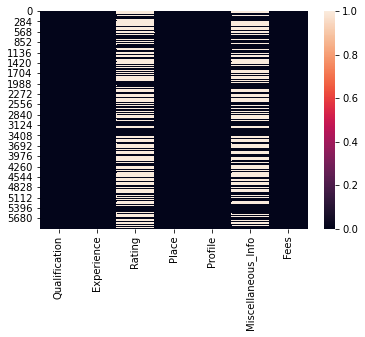

In [129]:
sns.heatmap(df.isnull())
plt.show()

Statistical Summary.

In [130]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Obseravtions in the given data and preprocessing: 

In [131]:
df=df.drop('Miscellaneous_Info',axis=1)

In [132]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


Experience column.

In [133]:
df['Experience']=df['Experience'].str.split().str[0]

In [134]:
df['Experience']=df['Experience'].astype(int)

In [135]:
df.head(2)

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350


Place column.

In [136]:
df['Place']=df['Place'].fillna('None,None')

In [137]:
df['Place'].isnull().sum()

0

In [138]:
df['Area']=df['Place'].str.split(',').str[0]
df['City']=df['Place'].str.split(',').str[1]
df.drop('Place',axis=1,inplace=True)

In [139]:
df.head(2)

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,350,Whitefield,Bangalore


Rating column.

In [140]:
df['Rating']=df['Rating'].str.split('%').str[0]

In [141]:
df.head(2)

,Qualification,Experience,Rating,Profile,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Whitefield,Bangalore


Qualification Column.

In [142]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [143]:
df['Qualification'].value_counts()

BDS                                                                                    488
BHMS                                                                                   477
BAMS                                                                                   471
MBBS                                                                                   334
MBBS, MS - ENT                                                                         220
                                                                                      ... 
BAMS, Yoga Instructor's Course, Certified Course in Yoga                                 1
BDS, Fundamental in Oral Implantology                                                    1
MBBS, MD - Dermatology, Diploma in Venereology, Diploma in Dermatology & Venerology      1
BDS, PCAD (USA)                                                                          1
MD - Dermatology, Diploma in Dermatology                                                 1

In [144]:
df['Qual_1'] = df['Qualification'].str.split(',').str[0]
df['Qual_2'] = df['Qualification'].str.split(',').str[1]
df['Qual_3'] = df['Qualification'].str.split(',').str[2]

In [145]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Area,City,Qual_1,Qual_2,Qual_3
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai,BAMS,NaN,NaN


In [146]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Profile             0
Fees                0
Area                0
City                1
Qual_1              0
Qual_2           1962
Qual_3           4590
dtype: int64

In [147]:
df['Rating']=df['Rating'].fillna(0)
df['City']=df['City'].fillna('xxx')
df['Qual_2']=df['Qual_2'].fillna('xxx')
df['Qual_3']=df['Qual_3'].fillna('xxx')

In [148]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
Area             0
City             0
Qual_1           0
Qual_2           0
Qual_3           0
dtype: int64

In [149]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Area,City,Qual_1,Qual_2,Qual_3
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,xxx
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,xxx
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,xxx
3,"BSc - Zoology, BAMS",12,0,Ayurveda,250,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,xxx
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai,BAMS,xxx,xxx


In [150]:
x=df.drop('Fees',axis=1)
y=df['Fees']

Analysis. 

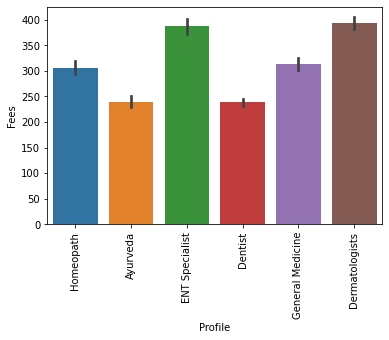

In [151]:
sns.barplot(x='Profile',y='Fees',data=df)
plt.xticks(rotation=90)
plt.show()

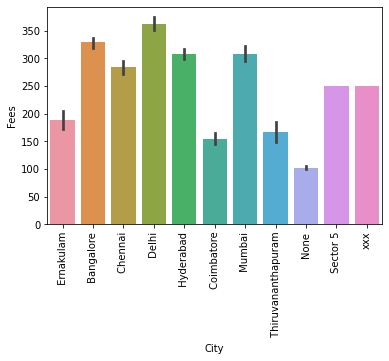

In [152]:
sns.barplot(x='City',y='Fees',data=df)
plt.xticks(rotation=90)
plt.show()

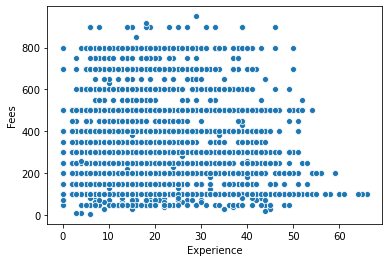

In [153]:
sns.scatterplot(x='Experience',y='Fees',data=df)
plt.show()

Encoding.

In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
le=LabelEncoder()

In [156]:
x.columns

Index(['Qualification', 'Experience', 'Rating', 'Profile', 'Area', 'City',
       'Qual_1', 'Qual_2', 'Qual_3'],
      dtype='object')

In [157]:
x['Profile']=le.fit_transform(x['Profile'])
x['Area']=le.fit_transform(x['Area'])
x['Qual_1']=le.fit_transform(x['Qual_1'])
x['Qual_2']=le.fit_transform(x['Qual_2'])
x['Qual_3']=le.fit_transform(x['Qual_3'])
x['City']=le.fit_transform(x['City'])

In [158]:
x.head()

,Qualification,Experience,Rating,Profile,Area,City,Qual_1,Qual_2,Qual_3
0,"BHMS, MD - Homeopathy",24,100,5,296,4,8,252,406
1,"BAMS, MD - Ayurveda Medicine",12,98,0,856,0,5,241,406
2,"MBBS, MS - Otorhinolaryngology",9,0,3,452,0,79,334,406
3,"BSc - Zoology, BAMS",12,0,0,68,0,12,7,406
4,BAMS,20,100,0,335,1,5,426,406


In [159]:
x.drop('Qualification',axis=1,inplace=True)

Splitting the data.

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=54)

In [161]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [162]:
lr=LinearRegression()
dr=DecisionTreeRegressor()
sv=SVR()
rf=RandomForestRegressor()

In [163]:
model=[lr,dr,sv,rf]

In [164]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)
    m.fit(x_train,y_train)
    predv=m.predict(x_test)
    print('mean_squared_error:',mean_squared_error(y_test,predv))
    print('mean_absolute_error:',mean_absolute_error(y_test,predv))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predv)))
    print('\n')

mean_squared_error: 32300.267509293935
mean_absolute_error: 146.82027920512377
root_mean_squared_error 179.72275178533724


mean_squared_error: 56766.71436556736
mean_absolute_error: 171.67691447736166
root_mean_squared_error 238.2576638128716


mean_squared_error: 35042.34588888303
mean_absolute_error: 149.4874520874054
root_mean_squared_error 187.19600927606078


mean_squared_error: 29861.189416695852
mean_absolute_error: 133.2185305704171
root_mean_squared_error 172.8039045180862




Regularization.

In [165]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [166]:
ls=ElasticNet(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predis=ls.predict(x_test)
print('mean_squared_error:',mean_squared_error(y_test,predis))
print('mean_absolute_error:',mean_absolute_error(y_test,predis))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predis)))

mean_squared_error: 32300.2655440652
mean_absolute_error: 146.8202857652049
root_mean_squared_error 179.72274631794718


In [167]:
lt=Lasso(alpha=0.001)
lt.fit(x_train,y_train)
lt.score(x_train,y_train)
predi=ls.predict(x_test)
print('mean_squared_error:',mean_squared_error(y_test,predi))
print('mean_absolute_error:',mean_absolute_error(y_test,predi))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predi)))

mean_squared_error: 32300.2655440652
mean_absolute_error: 146.8202857652049
root_mean_squared_error 179.72274631794718


In [168]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pedi=rd.predict(x_test)
print(r2_score(y_test,pedi))
print('mean_squared_error:',mean_squared_error(y_test,pedi))
print('mean_absolute_error:',mean_absolute_error(y_test,pedi))
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,pedi)))

0.09208907340040873
mean_squared_error: 32300.26749869612
mean_absolute_error: 146.82027922923493
root_mean_squared_error 179.72275175585344


Hyper Parameter Tunning.

In [169]:
from sklearn.model_selection import GridSearchCV
grid_param={'criterion':['mse','mae']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='r2',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'mse'}


In [170]:
gd_pred=gd.best_estimator_.predict(x_test)

In [171]:
r2_score(y_test,gd_pred)

0.8838687496440076

In [172]:
print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,gd_pred)))

root_mean_squared_error 64.27705777455394


Saving the Model.

In [190]:
import joblib
joblib.dump(gd.best_estimator_,'doctor_fee.obj')

['doctor_fee.obj']

Now we will apply the test data to predict the fees. We have to do all the preprocessing and EDA to test data that we did for train data.

In [191]:
df1=pd.read_excel('Final_Test.csv')

In [192]:
df1.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [193]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [194]:
df1.isnull().sum()


Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [195]:
df1.drop('Miscellaneous_Info',axis=1,inplace=True)

Experience column.

In [196]:
df1['Experience']=df1['Experience'].str.split().str[0]
df1['Experience']=df1['Experience'].astype(int)

In [197]:
df1.head()

,Qualification,Experience,Rating,Place,Profile
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist


In [198]:
df1['Place']=df1['Place'].fillna('None,None')

Creating city and area columns with provided place column.

In [199]:
df1['Area']=df1['Place'].str.split(',').str[0]
df1['City']=df1['Place'].str.split(',').str[1]
df1.drop('Place',axis=1,inplace=True)

Rating Column:

In [ ]:
df1['Rating']=df1['Rating'].str.split('%').str[0]

Working with Qualification column.

In [201]:
df1['Qual_1'] = df1['Qualification'].str.split(',').str[0]
df1['Qual_2'] = df1['Qualification'].str.split(',').str[1]
df1['Qual_3'] = df1['Qualification'].str.split(',').str[2]

Treating Null values:

In [202]:
df1['Rating']=df1['Rating'].fillna(0)
df1['City']=df1['City'].fillna('xxx')
df1['Area']=df1['Area'].fillna('xxx')
df1['Qual_2']=df1['Qual_2'].fillna('xxx')
df1['Qual_3']=df1['Qual_3'].fillna('xxx')

In [203]:
df1.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Area             0
City             0
Qual_1           0
Qual_2           0
Qual_3           0
dtype: int64

In [204]:
df1.drop('Qualification',axis=1,inplace=True)

In [205]:
df1.head()

,Experience,Rating,Profile,Area,City,Qual_1,Qual_2,Qual_3
0,35,0,General Medicine,Ghatkopar East,Mumbai,MBBS,xxx,xxx
1,31,0,ENT Specialist,West Marredpally,Hyderabad,MBBS,Diploma in Otorhinolaryngology (DLO),xxx
2,40,70,Dermatologists,KK Nagar,Chennai,MBBS,DDVL,xxx
3,0,0,Ayurveda,New Ashok Nagar,Delhi,BAMS,xxx,xxx
4,16,100,Dentist,Kanakpura Road,Bangalore,BDS,MDS - Conservative Dentistry & Endodontics,xxx


Encoding.

In [206]:
df1['Profile']=le.fit_transform(df1['Profile'])
df1['Area']=le.fit_transform(df1['Area'])
df1['Qual_1']=le.fit_transform(df1['Qual_1'])
df1['Qual_2']=le.fit_transform(df1['Qual_2'])
df1['Qual_3']=le.fit_transform(df1['Qual_3'])
df1['City']=le.fit_transform(df1['City'])

In [207]:
df1.head()

,Experience,Rating,Profile,Area,City,Qual_1,Qual_2,Qual_3
0,35,0,4,142,6,48,243,195
1,31,0,3,578,5,48,79,195
2,40,70,2,212,1,48,28,195
3,0,0,0,373,3,1,243,195
4,16,100,1,231,0,2,157,195


Loading the saved model to predict.

In [208]:
doctor_test_fee=joblib.load('doctor_fee.obj')

In [209]:
doctor_test_fee.predict(df1)

array([310.8, 456.1, 382.5, ..., 278.5, 220.5, 273. ])